# Analyse Listings dataset and identify outlier criteria


Since identification of outliers is imperative for Opendoor's success, this model endeavors to predict the which homes should be treated as outliers, and which should be removed from all subsequent analyses.

As this is a binary classification problem, we will create a logistic regression model that will predict whether or not a house is likely to be an outlier, based on the property's features. In future phases of the project we can train multiple classification based models to compare against each other, and use the one with the best performance

In [268]:
import pandas as pd
import numpy as np
import sys
import os
import time
import random
import seaborn as sns
from datetime import datetime
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
today = datetime.today()
os.chdir('/Users/saurabhkurjekar/Desktop/Data Analysis') 

In [269]:
df=pd.read_csv('THADataSet - MaskedTHAData.csv')

## Data

The data set contains the following features:
- **is_outlier**: Dependent variable of this model. We will use other independent variables (defining features of the home) to predict this 
- home_id: ID for the individual home
- market_id: ID for the city of the home
- zip_id: ID for the zip of the home
- purchase_date: Date on which the home was purchased
- purchase_price: Price at which the home was purchased
- year_built
- home_age
- zip_hpa
- zip_clearance_rate 
- zip_avg_num_bedrooms
- zip_avg_sq_ft
- zip_avg_home_age
- zip_avg_close_price
- zip_avg_lot_sq_ft
- and 120 others....

In [270]:
df.sample(5)

,home_id,market_id,zip_id,purchase_date,is_outlier,purchase_price,year_built,home_age,zip_hpa,zip_clearance_rate,...,porch_code,porch_area,patio_area,deck_flag,deck_area,feature_balcony_flag,balcony_area,breezeway_flag,driveway_area,driveway_material
3418,3419,4213,4187,6/8/18,0,222200,1997,22,0.076896,0.025524,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
1767,1768,1988,1775,4/25/18,0,167800,1996,23,0.054993,0.017895,...,P00,24.0,300.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
3414,3415,4213,4086,5/8/18,0,302000,1984,35,0.073714,0.045131,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
136,137,1499,1400,5/11/18,0,294000,1986,33,0.083084,0.027295,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
2944,2945,4213,4165,7/23/18,0,229800,2000,19,0.131291,0.036190,...,P00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 135 entries, home_id to driveway_material
dtypes: float64(62), int64(10), object(63)
memory usage: 5.1+ MB


In [272]:
df.describe()

,home_id,market_id,zip_id,is_outlier,purchase_price,year_built,home_age,zip_hpa,zip_clearance_rate,zip_avg_num_bedrooms,...,roof_construction,porch_area,patio_area,deck_flag,deck_area,feature_balcony_flag,balcony_area,breezeway_flag,driveway_area,driveway_material
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4901.000000,4732.000000,4994.000000,...,144.000000,4970.000000,4970.000000,4831.000000,4970.000000,1.0,0.0,1.0,4969.0,0.0
mean,2500.500000,3180.913800,3094.483600,0.158200,240392.786000,1997.660000,21.340000,0.091798,0.034989,3.492895,...,120.840278,63.868209,34.448893,0.052370,11.619316,0.0,NaN,0.0,0.0,NaN
std,1443.520003,1363.734682,1384.794154,0.364965,68563.675487,12.120816,12.120816,0.039169,0.016415,0.324938,...,25.200362,116.499159,111.639870,0.222795,59.769133,NaN,NaN,NaN,0.0,NaN
min,1.000000,3.000000,1.000000,0.000000,0.000000,1957.000000,2.000000,-0.036108,0.006386,1.502623,...,106.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.0,0.0,NaN
25%,1250.750000,1499.000000,1487.000000,0.000000,192000.000000,1990.000000,13.000000,0.064766,0.023787,3.294152,...,116.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.0,0.0,NaN
50%,2500.500000,4213.000000,4046.000000,0.000000,229750.000000,2001.000000,18.000000,0.088431,0.032057,3.540357,...,116.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.0,0.0,NaN
75%,3750.250000,4213.000000,4196.000000,0.000000,276025.000000,2006.000000,29.000000,0.109688,0.042411,3.705347,...,116.000000,84.000000,0.000000,0.000000,0.000000,0.0,NaN,0.0,0.0,NaN
max,5000.000000,5000.000000,5000.000000,1.000000,490000.000000,2017.000000,62.000000,0.433809,0.187500,7.518248,...,253.000000,1895.000000,2047.000000,1.000000,936.000000,0.0,NaN,0.0,0.0,NaN


# Data Preprocessing 

Playing around with the dataset to learn more about it  

### 1) Identifying % missing data in each column

In [273]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.head(10)

,column_name,percent_missing
home_id,home_id,0.0
bathrooms,bathrooms,0.0
parking,parking,0.0
bedrooms,bedrooms,0.0
home_age,home_age,0.0
year_built,year_built,0.0
sq_ft,sq_ft,0.0
is_outlier,is_outlier,0.0
market_id,market_id,0.0
zip_id,zip_id,0.0


Clearly, there are many fields that do not contain data about the houses. Fields like Driveway_material and balcony_area have no data. Moreover, a visual inspection of the fields tells us that these features wouldn't have an outsize influence in the price of a home (and thus not affect the dep also not be big contributors in predicting if a home is outlier or not. Since we have a rich dataset with multiple fields, we can be aggressive and remove columns  which have >=5% missing values

In [274]:
df = df.loc[:, df.isnull().sum() * 100 / len(df) <= 10]
df.shape

(5000, 72)

In [275]:
# df.dtypes
df_object=df.loc[:, df.dtypes == object]
# df_object.to_csv('df_object.csv')
df_object.sample(3)

,purchase_date,hvac_age,roof_age,septic,kitchen_condition,upgrades,bathroom_condition,floor_condition,pool,floor_type,...,interior_paint_condition,kitchen_counters,kitchen_appliance_type,is_condominium,sewer,roof,flooring,exterior_features,dwelling_type,view_description
4097,1/16/18,8_to_15_years,8_to_15_years,False,great_condition,True,great_condition,great_condition,none,tile,...,typical_use,formica,Stainless Steel,False,[Sewer - Public],"[""tile""]","[""tile""]","[""patio_open""]",single_family,None
789,2/21/18,0_to_7_years,0_to_7_years,False,great_condition,True,great_condition,great_condition,none,tile,...,great_condition,granite_slab,Stainless Steel,False,"[City Sewer, City Water]","[""composition""]","[""tile""]","[""patio_open""]",single_family,None
3693,4/11/18,not_sure,0_to_7_years,False,needs_work,False,typical_use,typical_use,community,tile,...,typical_use,formica,White,False,[Sewer - Public],"[""tile""]","[""carpet"",""laminate"",""tile""]","[""patio_covered""]",single_family,None


### 2) Converting categorical variables to columns

In [276]:
cat_vars=['hvac_age','roof_age','septic','kitchen_condition','upgrades','bathroom_condition','floor_condition','pool','floor_type','back_yard_condition','interior_paint_condition','kitchen_counters','kitchen_appliance_type','is_condominium','sewer','roof','flooring','exterior_features','dwelling_type','view_description']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
    df.drop([var],axis=1,inplace=True)
cat_vars=['hvac_age','roof_age','septic','kitchen_condition','upgrades','bathroom_condition','floor_condition','pool','floor_type','back_yard_condition','interior_paint_condition','kitchen_counters','kitchen_appliance_type','is_condominium','sewer','roof','flooring','exterior_features','dwelling_type','view_description']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

### 3) Converting date variables to the right format

In [277]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['purchase_date']=df['purchase_date'].map(dt.datetime.toordinal)

In [278]:
df.dropna(inplace=True)

In [279]:
df.shape

(4172, 716)

### 4) Treating for Multicollinearity

Some fields in the dataset are highly correlated. 
Eg: Year_Built is perfectly negatively correlated with home_age, thus contributing no additional predictive power to the model. Getting rid of such features- We're dropping 16 features as a result of this exercise. 

In [280]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

In [281]:
df=df.drop(df[to_drop], axis=1)
df.sample(3)

,home_id,purchase_date,is_outlier,purchase_price,year_built,zip_hpa,zip_clearance_rate,zip_avg_num_bedrooms,zip_avg_sq_ft,zip_avg_home_age,...,"exterior_features_[""storage_shed""]","exterior_features_[""storage_unit"",""sun_room""]","exterior_features_[""sun_room""]",dwelling_type_apartment,dwelling_type_half_duplex,dwelling_type_patio,dwelling_type_studio,view_description_Excellent,view_description_Lake,view_description_Water
2129,2130,736843,1,265000,1976,0.041411,0.017544,3.774582,2795.745819,34.638796,...,0,0,1,0,0,0,0,0,0,0
3102,3103,736565,0,258000,1995,0.087893,0.030451,2.967776,1602.070403,35.011909,...,0,0,0,0,0,0,0,0,0,0
1444,1445,736769,0,194900,2009,0.090259,0.026738,3.589952,2312.771988,7.944980,...,0,0,0,0,0,0,0,0,0,0


In [282]:
df=df.drop(['home_id'], axis=1)

# Exploratory Analysis
Investigating the distribution of various features in the data

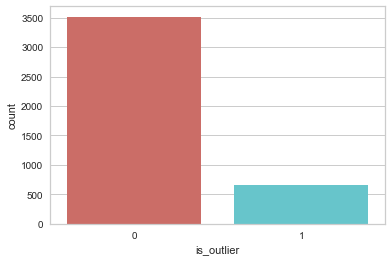

In [283]:
df.is_outlier.value_counts()
sns.countplot(x = 'is_outlier', data = df, palette = 'hls')
plt.show()

In [284]:
df.is_outlier.value_counts()

0    3515
1     657
Name: is_outlier, dtype: int64

In [285]:
df1 = df.reindex(columns=['purchase_price','sq_ft','year_built','tax_assessed_value_total','is_outlier'])#, 'previous_assessed_value', 'tax_assessed_value_total', 'tax_market_value_improvements', 'above_ground_interior_sq_ft', 'tax_assessed_value_improvements', 'roof_material', 'fireplace_count', 'area1st_floor', 'zip_avg_close_price'])

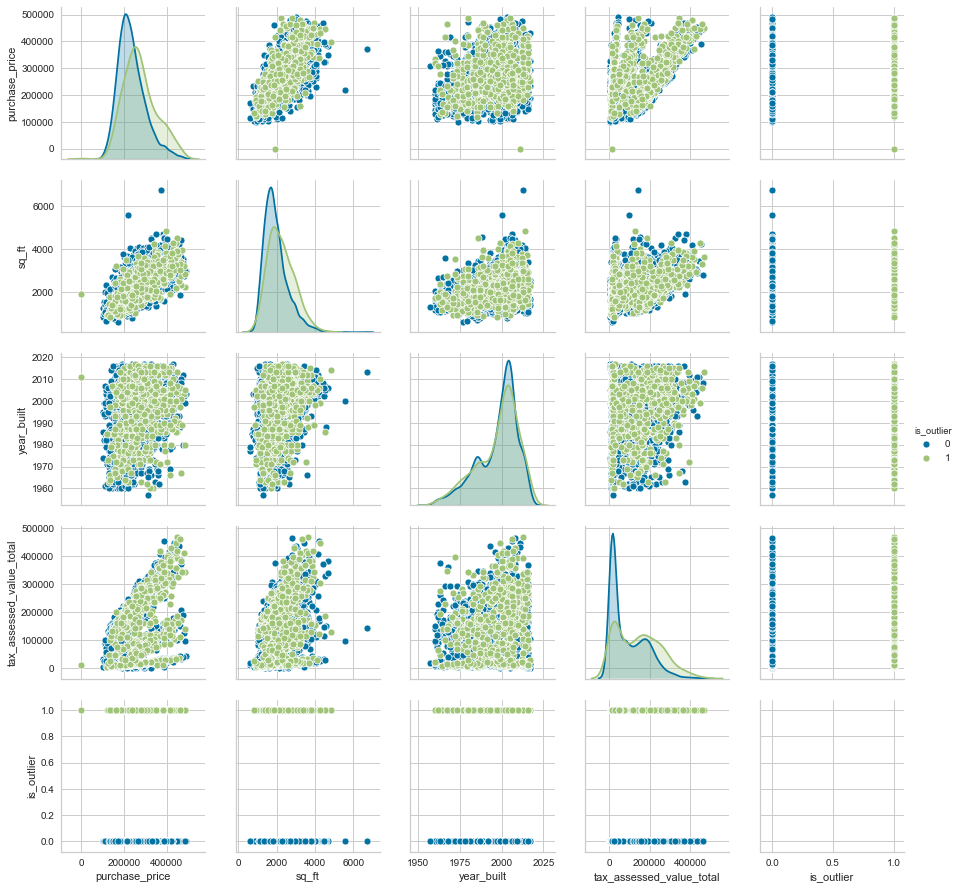

In [341]:
sns.pairplot(df1,hue='is_outlier')

As we can see, the outlier homes distinctly differ from regular homes

Splitting the dataset into test and train

In [287]:
# Used this cell to test a bunch of combinations of dependent variables to improve model performance. 
# df=df[['purchase_date','is_outlier','purchase_price','year_built','zip_hpa','zip_clearance_rate','zip_avg_num_bedrooms','zip_avg_sq_ft','zip_avg_home_age','zip_avg_close_price','zip_avg_lot_sq_ft','sq_ft','bedrooms','bathrooms','floors','parking','lot_sq_ft','basement_sq_ft','basement_finished_sq_ft','carport_spaces','fireplace','bathrooms_half','tax_year_assessed','tax_assessed_value_total','tax_assessed_value_improvements','tax_rate_area']]

In [288]:
X = df.drop('is_outlier',axis=1)
y = df['is_outlier']

In [289]:
df.to_csv('df_final.csv')

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

Training the model

In [291]:
logclf = LogisticRegression()

Feature Scaling not required in LogReg

In [292]:
logclf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [293]:
predictions = logclf.predict(X_test)

Classification report for the model:

In [294]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       886
           1       0.00      0.00      0.00       157

    accuracy                           0.85      1043
   macro avg       0.42      0.50      0.46      1043
weighted avg       0.72      0.85      0.78      1043



In [342]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# cm = confusion_matrix(y_test, predictions) 
# # Transform to df for easier plotting
# cm_df = pd.DataFrame(cm,
#                      index = ['0','1'], 
#                      columns = ['0','1'])

# plt.figure(figsize=(10,10))
# sns.heatmap(cm_df, annot=True)
# plt.title('Log Regression Confusion Matrix \nAccuracy:{0:3f}'.format(accuracy_score(y_test, predictions)))
# plt.ylabel('True label')
# plt.xlabel('Predicted label')

# plt.show()

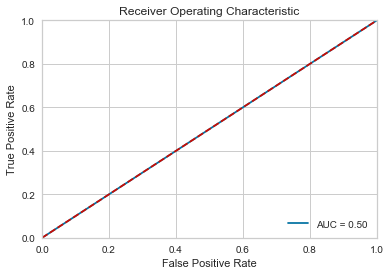

In [296]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [297]:
cm

array([[886,   0],
       [157,   0]])

Since the results are as good (read bad!) as a coin flip. This model is predicting all only 0s, and no outliers. Let's try some other classification model. 

Running K-Nearest Neighbor and Dtree

In [298]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X,y)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       886
           1       0.00      0.00      0.00       157

    accuracy                           0.85      1043
   macro avg       0.42      0.50      0.46      1043
weighted avg       0.72      0.85      0.78      1043



In [299]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X,y)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       886
           1       0.00      0.00      0.00       157

    accuracy                           0.85      1043
   macro avg       0.42      0.50      0.46      1043
weighted avg       0.72      0.85      0.78      1043



Same pitiable results. The model is suffering from an imbalance of data (too few outliers in the dataset)

Let's fix that. We can do that by either changing our training model, or by creating a balanced dataset to retrain our existing model. <br><br>
Ways to balance a dataset: <br>
    1) Undersampling<br>
    2) Oversampling<br>
For simplicity's sake, we'll go the undersampling route. Downside is that this results in a major loss of data

In [300]:
df.is_outlier.value_counts()

0    3515
1     657
Name: is_outlier, dtype: int64

In [301]:
df_1=df[df['is_outlier']==1]
df_0=df[df['is_outlier']==0]

In [302]:
df_0=df_0.sample(df.is_outlier.sum())

In [303]:
df_0.shape

(657, 676)

In [304]:
df= df_0.append([df_1], sort=False)

In [305]:
df.sample(3)

,purchase_date,is_outlier,purchase_price,year_built,zip_hpa,zip_clearance_rate,zip_avg_num_bedrooms,zip_avg_sq_ft,zip_avg_home_age,zip_avg_close_price,...,"exterior_features_[""storage_shed""]","exterior_features_[""storage_unit"",""sun_room""]","exterior_features_[""sun_room""]",dwelling_type_apartment,dwelling_type_half_duplex,dwelling_type_patio,dwelling_type_studio,view_description_Excellent,view_description_Lake,view_description_Water
3434,736520,1,196100,2002,0.091910,0.025670,3.651670,2272.193673,13.404569,258621.7197,...,0,0,0,0,0,0,0,0,0,0
3880,736682,0,255000,2004,0.056253,0.023836,3.705347,2278.968714,12.286689,258243.0368,...,0,0,0,0,0,0,0,0,0,0
4358,736906,1,266400,1999,0.087696,0.066190,3.283865,2092.011217,18.763589,274136.5276,...,0,0,0,0,0,0,0,0,0,0


In [306]:
X = df.drop('is_outlier',axis=1)
y = df['is_outlier']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [343]:
df.to_csv('model_input.csv')

In [307]:
logclf = LogisticRegression()
logclf.fit(X,y)
predictions = logclf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.60      0.71      0.65       155
           1       0.69      0.57      0.63       174

    accuracy                           0.64       329
   macro avg       0.64      0.64      0.64       329
weighted avg       0.65      0.64      0.64       329



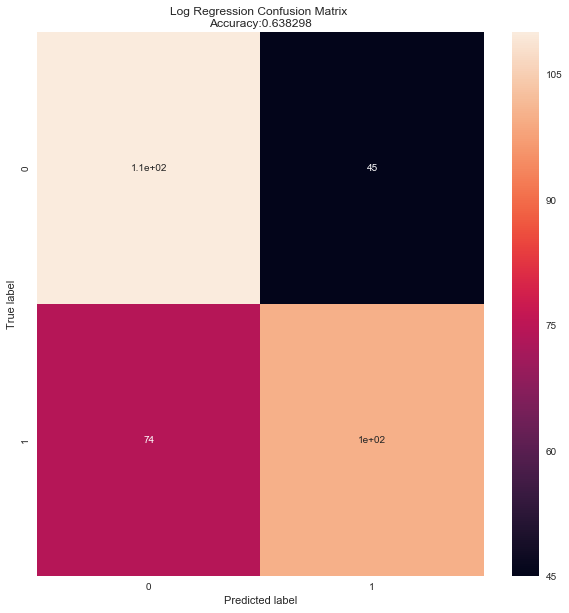

In [308]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

cm = confusion_matrix(y_test, predictions) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['0','1'], 
                     columns = ['0','1'])

plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Log Regression Confusion Matrix \nAccuracy:{0:3f}'.format(accuracy_score(y_test, predictions)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [309]:
cm

array([[110,  45],
       [ 74, 100]])

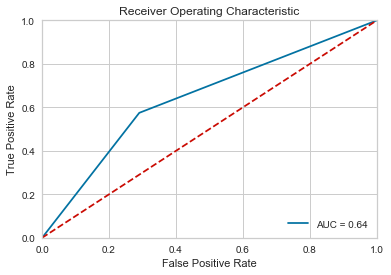

In [310]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [326]:
list1= X.columns.values.tolist()
feature_names = np.asarray(list1)
feature_names.shape
X.sample(2)

,purchase_date,purchase_price,year_built,zip_hpa,zip_clearance_rate,zip_avg_num_bedrooms,zip_avg_sq_ft,zip_avg_home_age,zip_avg_close_price,zip_avg_lot_sq_ft,...,"exterior_features_[""storage_shed""]","exterior_features_[""storage_unit"",""sun_room""]","exterior_features_[""sun_room""]",dwelling_type_apartment,dwelling_type_half_duplex,dwelling_type_patio,dwelling_type_studio,view_description_Excellent,view_description_Lake,view_description_Water
896,736856,222700,2001,0.057143,0.030790,3.708806,2483.444444,7.700984,297503.8300,10738.82135,...,0,0,0,0,0,0,0,0,0,0
4126,736753,250200,1993,0.060083,0.021202,3.443836,2032.769178,28.394178,295882.9106,8671.84726,...,0,0,0,0,0,0,0,0,1,0


<Figure size 432x288 with 0 Axes>

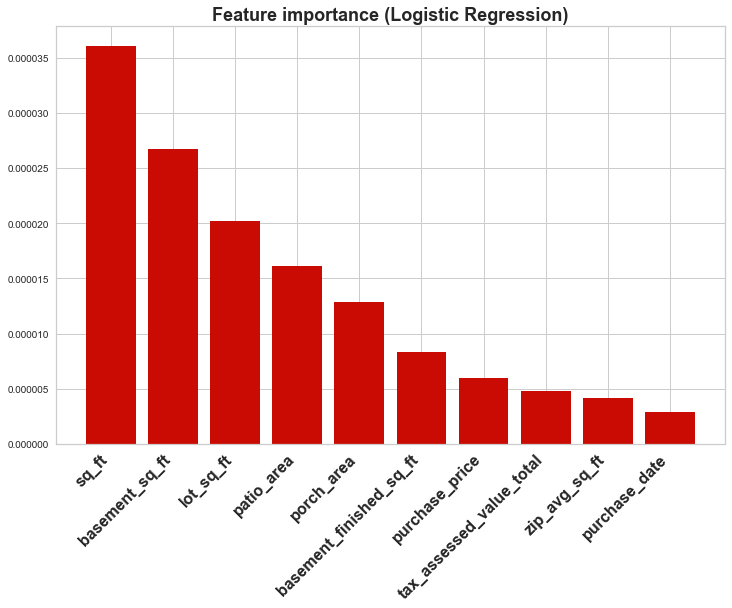

<Figure size 432x288 with 0 Axes>

In [340]:
coefs = np.abs(logclf.coef_[0])
indices = np.argsort(coefs)[::-1]
plt.figure()
plt.figure(figsize=(12,10))
plt.title("Feature importance (Logistic Regression)", fontsize=18,fontweight='bold')
plt.bar(range(10), coefs[indices[:10]],
       color="r", align="center")
plt.xticks(range(10), feature_names[indices[:10]], rotation=45, ha='right', fontsize=16,fontweight='bold')
plt.subplots_adjust(bottom=0.3)
plt.figure()
plt.ion(); plt.show()